In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA 

In [5]:
df.shape

(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

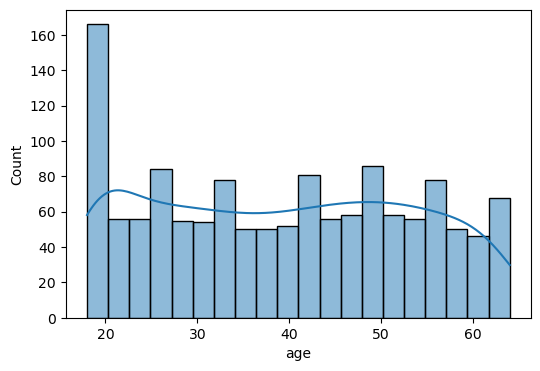

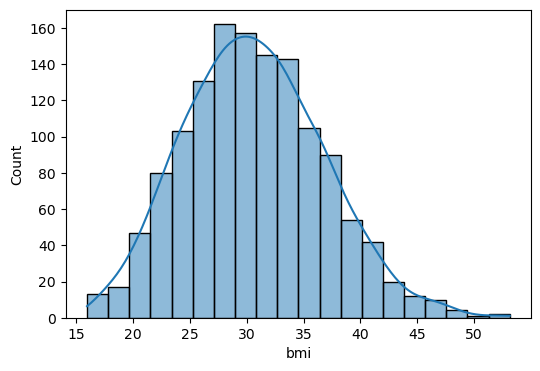

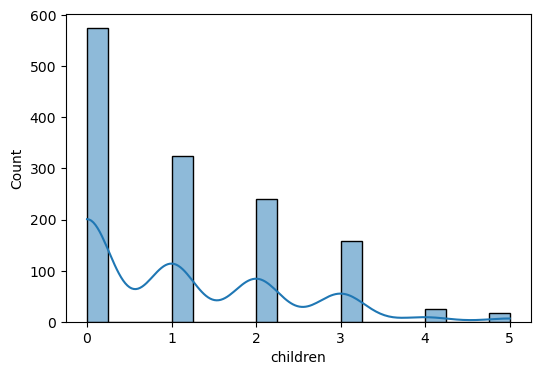

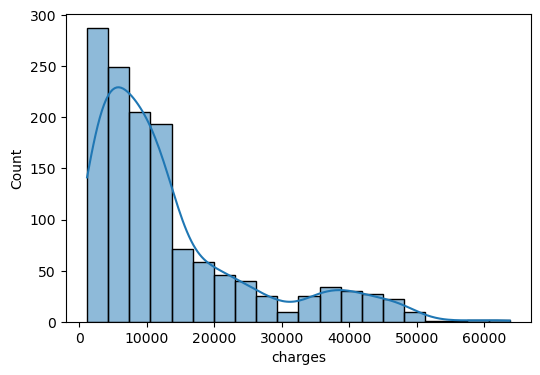

In [11]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
    plt.figure(figsize = (6, 4))
    sns.histplot(df[col], kde = True, bins = 20)

<Axes: xlabel='children', ylabel='count'>

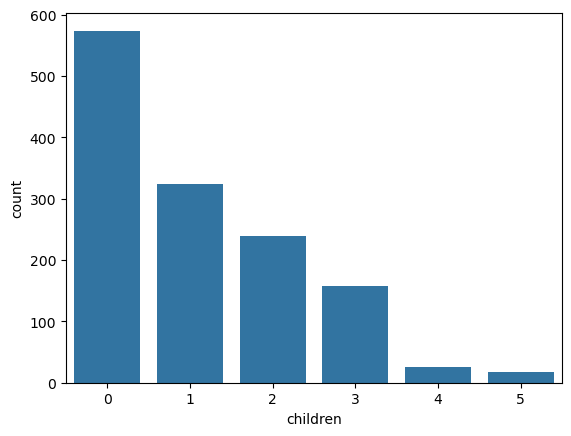

In [12]:
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

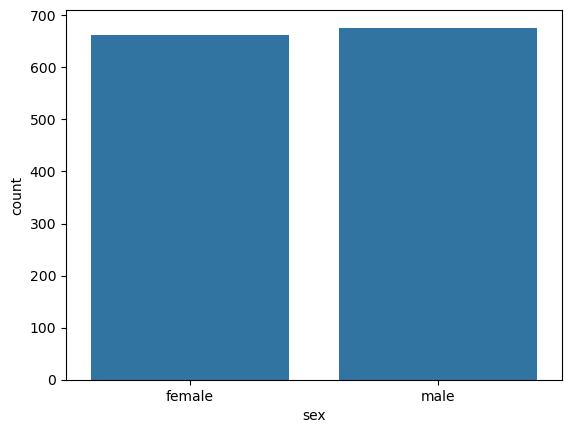

In [13]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

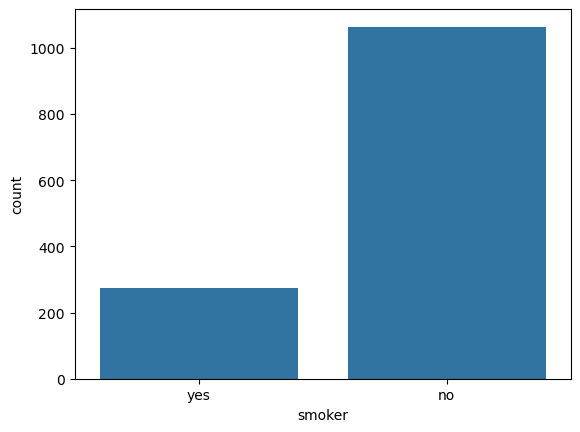

In [14]:
sns.countplot(x = df['smoker'])

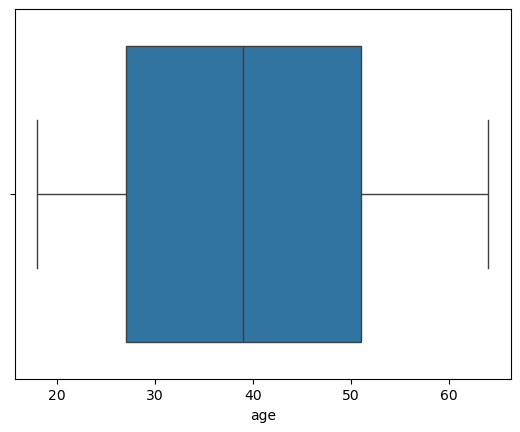

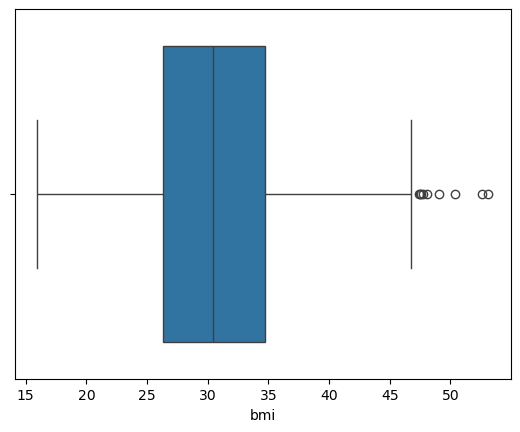

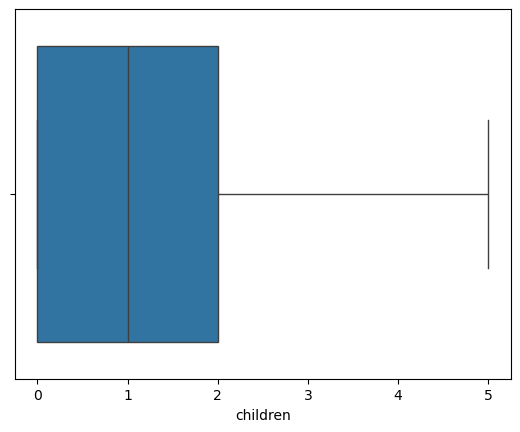

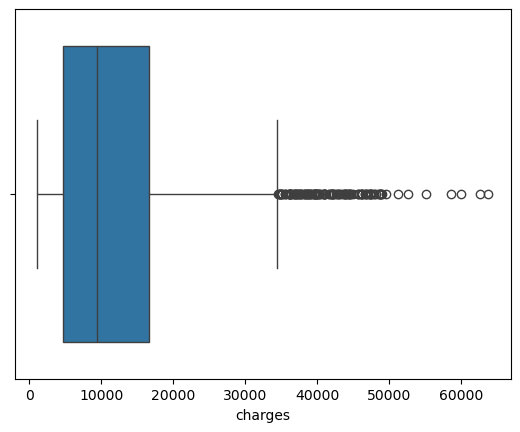

In [15]:
for col in numeric_columns:
    plt.figure(figure =  (6,4))
    sns.boxplot(x = df[col])

<Axes: >

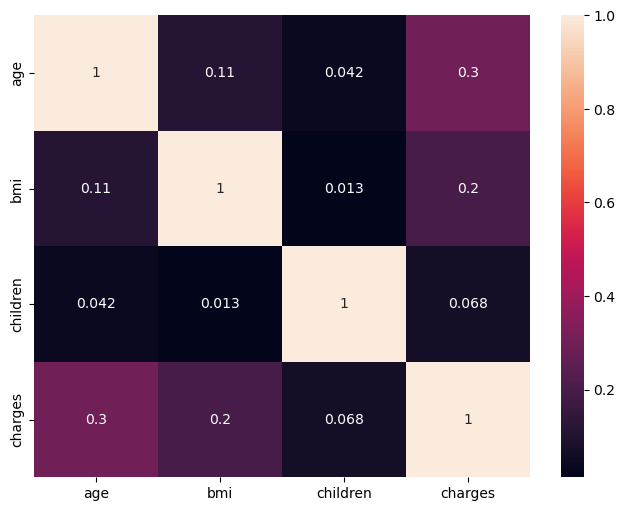

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data cleaning and preprocessing

In [17]:
df_cleaned = df.copy()

In [18]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df_cleaned.shape

(1338, 7)

In [20]:
df_cleaned.drop_duplicates(inplace=True)

In [21]:
df_cleaned.shape

(1337, 7)

In [22]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [24]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [25]:
df_cleaned['sex'] = df_cleaned['sex'].map({"male": 0 ,"female": 1})

In [26]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [27]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [28]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({"no": 0 ,"yes": 1})

In [29]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [30]:
df_cleaned.rename(columns={
    'sex' : 'Gender', 
    'smoker' : 'is_smoker'
}, inplace = True)

In [31]:
df_cleaned.head()

,age,Gender,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [32]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [33]:
df_cleaned = pd.get_dummies(df_cleaned, columns = ['region'], dtype=int)

In [34]:
df_cleaned

,age,Gender,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [35]:
df_cleaned = df_cleaned.astype(int)

In [36]:
df_cleaned

,age,Gender,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,0,1,0,0
1334,18,1,31,0,0,2205,1,0,0,0
1335,18,1,36,0,0,1629,0,0,1,0
1336,21,1,25,0,0,2007,0,0,0,1


# Feature Engineering and extraction

<Axes: xlabel='bmi', ylabel='Count'>

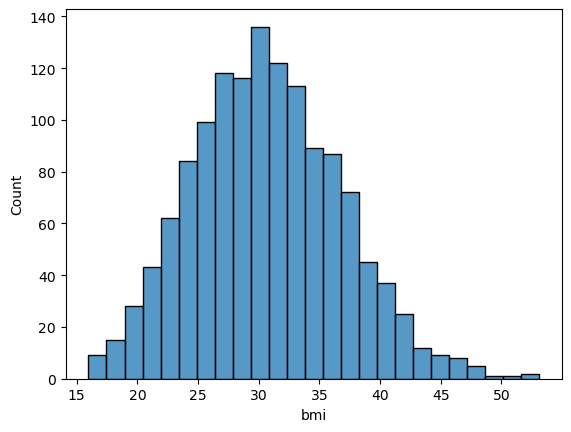

In [37]:
sns.histplot(df['bmi'])

In [38]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'], 
    bins = [0, 18.5, 24.9, 29.9, float('inf')],
    labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [39]:
df_cleaned

,age,Gender,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obese
2,28,0,33,3,0,4449,0,0,1,0,Obese
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,0,1,0,0,Obese
1334,18,1,31,0,0,2205,1,0,0,0,Obese
1335,18,1,36,0,0,1629,0,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,0,1,Overweight


In [40]:
df_cleaned = pd.get_dummies(df_cleaned, columns = ['bmi_category'], dtype=int)

In [41]:
df_cleaned

,age,Gender,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,0,1,0,0,0,0,0,1
1334,18,1,31,0,0,2205,1,0,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,0,1,0,0,0,0,1
1336,21,1,25,0,0,2007,0,0,0,1,0,0,1,0


In [42]:
df_cleaned.columns

Index(['age', 'Gender', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [44]:
df_cleaned

,age,Gender,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,0,1,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1,0,0,0,0,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,1,0,0,0,0,0,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,0,1,0,0,0,0,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,0,1,0,0,1,0


In [45]:
from scipy.stats import pearsonr

# list of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'Gender', 'is_smoker', 'region_northeast',
    'region_northwest', 'region_southeast', 'region_southwest', 'bmi_category_Normal',
    'bmi_category_Overweight', 'bmi_category_Obese', 'bmi_category_Underweight']

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges']) [0]
    for feature in selected_features }

correlation_df = pd.DataFrame(list(correlations.items()), columns = ['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by = 'Pearson Correlation', ascending = False)
    

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
11,bmi_category_Obese,0.200348
1,bmi,0.196236
7,region_southeast,0.073577
2,children,0.067390
5,region_northeast,0.005946
6,region_northwest,-0.038695
8,region_southwest,-0.043637
12,bmi_category_Underweight,-0.050599


In [46]:
cat_features = [
    'Gender', 'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest',
    'region_northeast', 'bmi_category_Underweight', 'bmi_category_Normal', 'bmi_category_Overweight', 
    'bmi_category_Obese'  ]


In [47]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q = 4, labels= False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _ , _ = chi2_contingency(contingency)
    decision = 'Reject Null (keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)' 
    chi2_results[col] = {
        'chi2_statistic' : chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by = 'p_value')
chi2_df
    

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (keep Feature)
region_southeast,15.998167,0.001135,Reject Null (keep Feature)
Gender,10.258784,0.01649,Reject Null (keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (keep Feature)
region_northeast,6.438442,0.092122,Accept Null (Drop Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
bmi_category_Underweight,3.37403,0.337471,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [48]:
final_df = df_cleaned[['age', 'Gender', 'bmi', 'children', 'is_smoker', 'charges', 'region_southeast', 'bmi_category_Obese']]

In [49]:
final_df

,age,Gender,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = final_df.drop('charges', axis = 1)
y = final_df['charges']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()